In [3]:
import pandas as pd
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/Users/beyazituysal/Documents/PythonProjects/MLalgorithm/datasets/hotel_reservations_data.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [7]:
df.isnull().sum()/len(df)#null check

Booking_ID                              0.0
no_of_adults                            0.0
no_of_children                          0.0
no_of_weekend_nights                    0.0
no_of_week_nights                       0.0
type_of_meal_plan                       0.0
required_car_parking_space              0.0
room_type_reserved                      0.0
lead_time                               0.0
arrival_year                            0.0
arrival_month                           0.0
arrival_date                            0.0
market_segment_type                     0.0
repeated_guest                          0.0
no_of_previous_cancellations            0.0
no_of_previous_bookings_not_canceled    0.0
avg_price_per_room                      0.0
no_of_special_requests                  0.0
booking_status                          0.0
dtype: float64

/var/folders/s2/slmy12b17yn32cb73qfcpdjh0000gn/T/ipykernel_2991/1001107408.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr().round(2)


<AxesSubplot: >

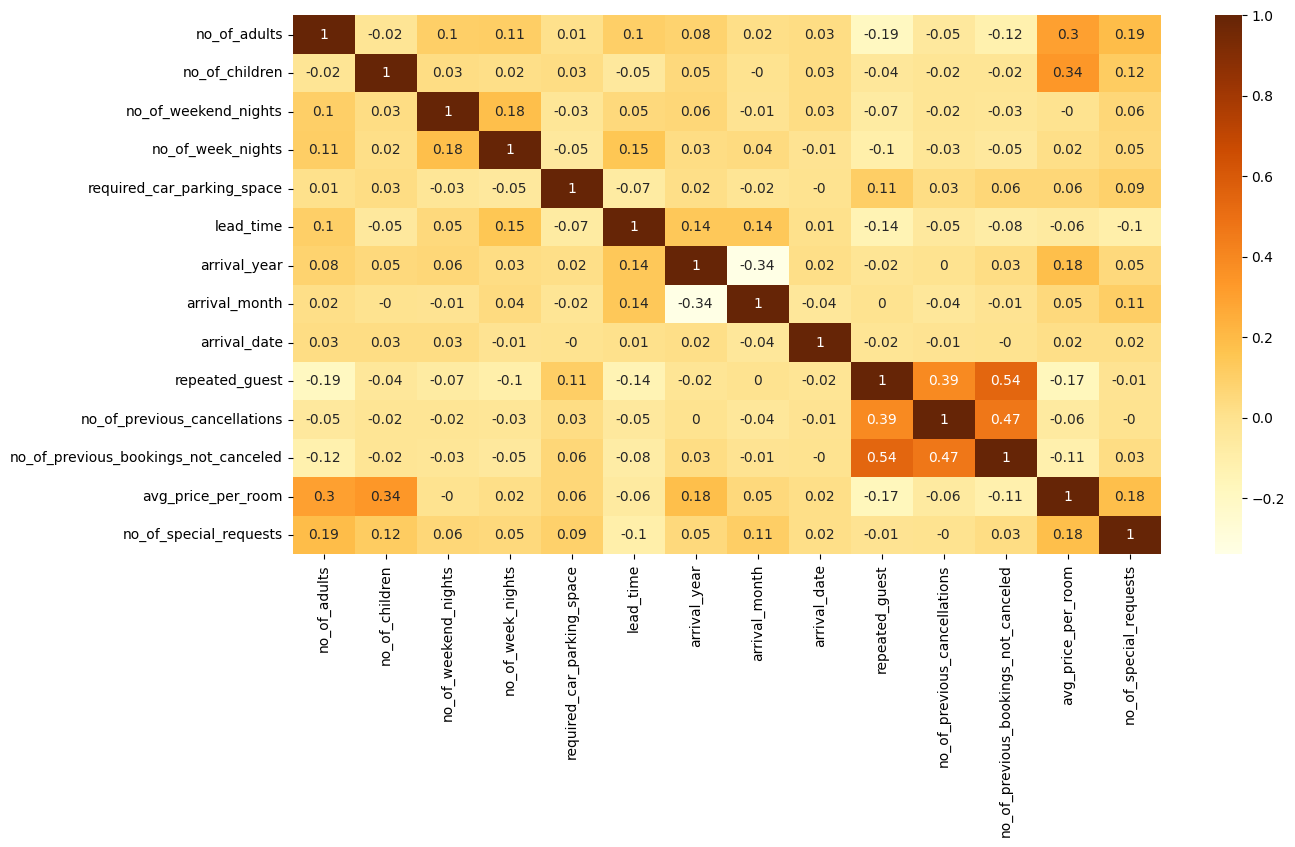

In [8]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

In [9]:
df = df.drop('Booking_ID', axis = 1)# booking id removed 

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder_type_of_meal_plan = LabelEncoder()
label_encoder_room_type_reserved = LabelEncoder()
label_encoder_market_segment_type = LabelEncoder()
label_encoder_booking_status = LabelEncoder()

df['type_of_meal_plan'] = label_encoder_type_of_meal_plan.fit_transform(df['type_of_meal_plan'])
df['room_type_reserved'] = label_encoder_room_type_reserved.fit_transform(df['room_type_reserved'])
df['market_segment_type'] = label_encoder_market_segment_type.fit_transform(df['market_segment_type'])
df['booking_status'] = label_encoder_booking_status.fit_transform(df['booking_status'])

In [11]:
X = df.drop('booking_status', axis = 1)
X = X.values
y = df['booking_status']

In [12]:
# StandardScaler to put our data in the same scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [21]:
#model
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [26]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
score = gnb.score(X_test, y_test)
print(f'Score : %{(score * 100):.2f}')

Score : %45.06


Max Train Score : %99.2637758246035 - K : [1]
Max Test Score : %81.16501286291805 - K : [1]


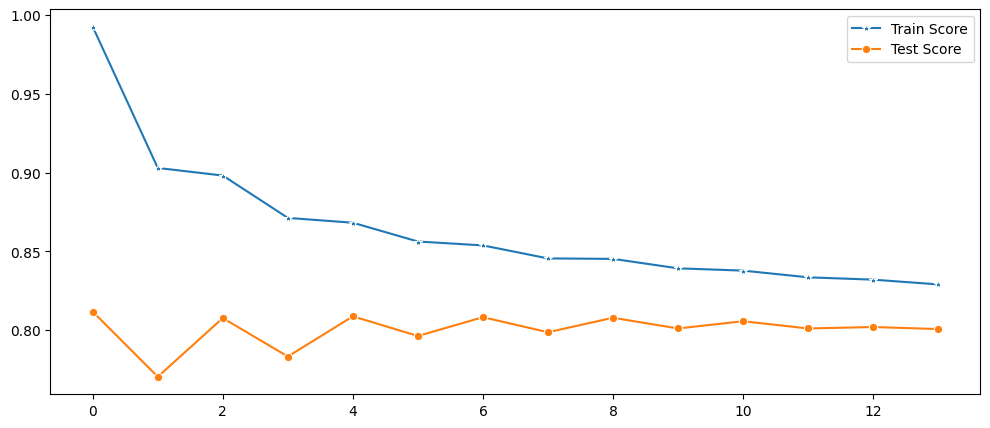

In [27]:
# find best k for knn
from sklearn.neighbors import KNeighborsClassifier
test_score = []
train_score = []

for i in range(1, 15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

# max scores
max_train_score = max(train_score)
train_score_ind = [i for i, v in enumerate(train_score) if v == max_train_score]
 
max_test_score = max(test_score)
test_score_ind = [i for i, v in enumerate(test_score) if v == max_test_score]


print(f'Max Train Score : %{max_train_score * 100} - K : {list(map(lambda x: x+1, train_score_ind))}')
print(f'Max Test Score : %{max_test_score * 100} - K : {list(map(lambda x: x+1, test_score_ind))}')

# graph

plt.figure(figsize=(12, 5))
p = sns.lineplot(train_score, marker="*", label="Train Score")
p = sns.lineplot(test_score, marker="o", label="Test Score")
plt.show()

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = knn.score(X_test, y_test)
print(f'Score : %{(score * 100):.2f}')


Score : %81.17


In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
score = rfc.score(X_test, y_test)
print(f'Score : %{(score * 100):.2f}')

Score : %90.06


In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc = RandomForestClassifier()
dtc.fit(X_train, y_train)
score = dtc.score(X_test, y_test)
print(f'Score : %{(score * 100):.2f}')

Score : %90.02
